# Analysis and Statistics

In [70]:
# Import Libraries

# data manipulation and analysis
import pandas as pd

# multi-dimensional arrays and matrices
# mathematical functions
import numpy as np

# parsing & processing Python Source Code
# convert strings of Python code into executable code
import ast # Abstract Syntax Trees (AST) module

# data visualization
import matplotlib.pyplot as plt # creating static, animated, and interactive visualizations
import seaborn as sns # interface for drawing & statistical graphics
import mplcursors # interactive data cursors
import plotly.express as px

# database adapter for Python
import psycopg2 # allows interaction with PostgreSQL
import pandas as pd

# probability distributions and statistical functions
from scipy.stats import norm 
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [71]:
# Read uncleaned disney_movies.csv file
df_2 = pd.read_csv(r'C:\Users\ashwi\Documents\Data Analytics\Portfolio\Disney_Movies\Cleaned\Python\df_2.csv', index_col=False, sep=',')

In [72]:
df_2

,movie_name,Running time (min),Release date,Box office
0,Pinocchio (1940film),01:28,1940-02-07,164000000
1,Fantasia (1940film),02:06,1940-11-13,76400000
2,The Reluctant Dragon (1941film),01:14,1941-06-27,960000
3,Dumbo,01:04,1941-10-23,1300000
4,Bambi,01:10,1942-08-09,267399999
...,...,...,...,...
366,Chang Can Dunk,01:49,2023-03-10,NaN
367,Peter Pan Wendy,01:49,2023-04-28,NaN
368,Crater (film),01:45,2023-05-12,NaN
369,Worlds Best (film),01:41,2023-06-23,NaN


In [73]:
df_2.columns

Index(['movie_name', 'Running time (min)', 'Release date', 'Box office'], dtype='object')

In [74]:
# Define a function to process the movie names
def process_movie_name(name):
    import re
    # Regular expression to match sequences of 4 numbers followed by alpha characters
    pattern = r'(\d{4})([a-zA-Z]+)'
    # Check if the name contains parentheses
    if '(' in name and ')' in name:
        # If it does, apply the regular expression to the part inside the parentheses
        name = re.sub(pattern, r'\1 \2', name)
    return name

# Apply the function to the movie_name column
df_2['movie_name'] = df_2['movie_name'].apply(process_movie_name)

# Display the updated DataFrame
df_2

,movie_name,Running time (min),Release date,Box office
0,Pinocchio (1940 film),01:28,1940-02-07,164000000
1,Fantasia (1940 film),02:06,1940-11-13,76400000
2,The Reluctant Dragon (1941 film),01:14,1941-06-27,960000
3,Dumbo,01:04,1941-10-23,1300000
4,Bambi,01:10,1942-08-09,267399999
...,...,...,...,...
366,Chang Can Dunk,01:49,2023-03-10,NaN
367,Peter Pan Wendy,01:49,2023-04-28,NaN
368,Crater (film),01:45,2023-05-12,NaN
369,Worlds Best (film),01:41,2023-06-23,NaN


In [75]:
df_2.to_csv('df_3.csv', index=False, sep=',', encoding='utf-8')

In [76]:
# Read uncleaned disney_movies.csv file
df_3 = pd.read_csv(r'C:\Users\ashwi\Documents\Data Analytics\Portfolio\Disney_Movies\Cleaned\Python\df_3.csv', index_col=False, sep=',')

# df_3

## Data Exploration

In [77]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_name          371 non-null    object 
 1   Running time (min)  369 non-null    object 
 2   Release date        371 non-null    object 
 3   Box office          269 non-null    float64
dtypes: float64(1), object(3)
memory usage: 11.7+ KB


In [78]:
df_3.shape

(371, 4)

In [79]:
df_3.describe()

,Box office
count,269
mean,1935761693
std,30481216357
min,0
25%,5100000
50%,22900000
75%,72200000
max,500000302000


In [80]:
df_3['Box office']

0     164000000
1      76400000
2        960000
3       1300000
4     267399999
         ...   
366         NaN
367         NaN
368         NaN
369         NaN
370         NaN
Name: Box office, Length: 371, dtype: float64

In [81]:
# Describe the DataFrame with floating-point precision
df_3_description = df_3.describe()

# Display the summary statistics with float format
with pd.option_context('display.float_format', '{:.2f}'.format):
    print(df_3_description)

           Box office
count          269.00
mean    1935761693.45
std    30481216357.08
min              0.16
25%        5100000.00
50%       22900000.00
75%       72200000.00
max   500000302000.00


In [82]:
df_3.isnull().sum()

movie_name              0
Running time (min)      2
Release date            0
Box office            102
dtype: int64

Box office contains 102 null values

## Data Cleaning

### Handling Missing Values

In [83]:
# df_3.drop(na)

# see: 1 import_and_duplicates_columns.ipynb
# see: 2 quality assurance.ipynb

# Drop rows with missing values
df_3_cleaned = df_3.dropna()

# Checking if there are still missing values after dropping
print(df_3_cleaned.isnull().sum())

movie_name            0
Running time (min)    0
Release date          0
Box office            0
dtype: int64


In [84]:
df_3

,movie_name,Running time (min),Release date,Box office
0,Pinocchio (1940 film),01:28,1940-02-07,164000000
1,Fantasia (1940 film),02:06,1940-11-13,76400000
2,The Reluctant Dragon (1941 film),01:14,1941-06-27,960000
3,Dumbo,01:04,1941-10-23,1300000
4,Bambi,01:10,1942-08-09,267399999
...,...,...,...,...
366,Chang Can Dunk,01:49,2023-03-10,NaN
367,Peter Pan Wendy,01:49,2023-04-28,NaN
368,Crater (film),01:45,2023-05-12,NaN
369,Worlds Best (film),01:41,2023-06-23,NaN


In [85]:
# df_3.fillna()

# see: 1 import_and_duplicates_columns.ipynb
# see: 2 quality assurance.ipynb

# Fill missing values in 'Running time (min)' with the mean value of the column
df_3['Box office'].fillna(df_3['Box office'].mean(), inplace=True)

# Fill missing values in 'Box office' with 0
df_3['Box office'].fillna(0, inplace=True)

In [86]:
df_3

,movie_name,Running time (min),Release date,Box office
0,Pinocchio (1940 film),01:28,1940-02-07,164000000
1,Fantasia (1940 film),02:06,1940-11-13,76400000
2,The Reluctant Dragon (1941 film),01:14,1941-06-27,960000
3,Dumbo,01:04,1941-10-23,1300000
4,Bambi,01:10,1942-08-09,267399999
...,...,...,...,...
366,Chang Can Dunk,01:49,2023-03-10,1935761693
367,Peter Pan Wendy,01:49,2023-04-28,1935761693
368,Crater (film),01:45,2023-05-12,1935761693
369,Worlds Best (film),01:41,2023-06-23,1935761693


### Remove Duplicates

In [87]:
# see: 1 import_and_duplicates_columns.ipynb
# see: 2 quality assurance.ipynb

In [88]:
df_3

,movie_name,Running time (min),Release date,Box office
0,Pinocchio (1940 film),01:28,1940-02-07,164000000
1,Fantasia (1940 film),02:06,1940-11-13,76400000
2,The Reluctant Dragon (1941 film),01:14,1941-06-27,960000
3,Dumbo,01:04,1941-10-23,1300000
4,Bambi,01:10,1942-08-09,267399999
...,...,...,...,...
366,Chang Can Dunk,01:49,2023-03-10,1935761693
367,Peter Pan Wendy,01:49,2023-04-28,1935761693
368,Crater (film),01:45,2023-05-12,1935761693
369,Worlds Best (film),01:41,2023-06-23,1935761693


In [89]:
# Convert 'Box office' column to float data type
df_3['Box office'] = df_3['Box office'].astype(float)

# Round the values to remove decimal places
df_3['Box office'] = df_3['Box office'].round(0)

# Display the DataFrame to verify changes
df_3

,movie_name,Running time (min),Release date,Box office
0,Pinocchio (1940 film),01:28,1940-02-07,164000000
1,Fantasia (1940 film),02:06,1940-11-13,76400000
2,The Reluctant Dragon (1941 film),01:14,1941-06-27,960000
3,Dumbo,01:04,1941-10-23,1300000
4,Bambi,01:10,1942-08-09,267399999
...,...,...,...,...
366,Chang Can Dunk,01:49,2023-03-10,1935761693
367,Peter Pan Wendy,01:49,2023-04-28,1935761693
368,Crater (film),01:45,2023-05-12,1935761693
369,Worlds Best (film),01:41,2023-06-23,1935761693


In [90]:
# Set display options to show full float values without scientific notation
pd.set_option('display.float_format', lambda x: '{:.0f}'.format(x))

# Display the DataFrame to see the updated representation
df_3

,movie_name,Running time (min),Release date,Box office
0,Pinocchio (1940 film),01:28,1940-02-07,164000000
1,Fantasia (1940 film),02:06,1940-11-13,76400000
2,The Reluctant Dragon (1941 film),01:14,1941-06-27,960000
3,Dumbo,01:04,1941-10-23,1300000
4,Bambi,01:10,1942-08-09,267399999
...,...,...,...,...
366,Chang Can Dunk,01:49,2023-03-10,1935761693
367,Peter Pan Wendy,01:49,2023-04-28,1935761693
368,Crater (film),01:45,2023-05-12,1935761693
369,Worlds Best (film),01:41,2023-06-23,1935761693


In [91]:
# Find rows with empty values
empty_rows = df_3[df_3.isnull().any(axis=1)]

# Display the rows with empty values
print(empty_rows)

                 movie_name Running time (min) Release date  Box office
310    Anaganaga O Dheerudu                NaN   2011-01-14  1935761693
340  Ghost of the Mountains                NaN   2017-06-30  1935761693


In [92]:
df_3.to_csv('df_3.csv', index=False, sep=',', encoding='utf-8')

In [93]:
# Read uncleaned disney_movies.csv file
df_3 = pd.read_csv(r'C:\Users\ashwi\Documents\Data Analytics\Portfolio\Disney_Movies\Cleaned\Python\df_3.csv', index_col=False, sep=',')

In [94]:
df_3

,movie_name,Running time (min),Release date,Box office
0,Pinocchio (1940 film),01:28,1940-02-07,164000000
1,Fantasia (1940 film),02:06,1940-11-13,76400000
2,The Reluctant Dragon (1941 film),01:14,1941-06-27,960000
3,Dumbo,01:04,1941-10-23,1300000
4,Bambi,01:10,1942-08-09,267399999
...,...,...,...,...
366,Chang Can Dunk,01:49,2023-03-10,1935761693
367,Peter Pan Wendy,01:49,2023-04-28,1935761693
368,Crater (film),01:45,2023-05-12,1935761693
369,Worlds Best (film),01:41,2023-06-23,1935761693


## Visualization libraries

### Matplotlib

In [95]:
df_3.columns

Index(['movie_name', 'Running time (min)', 'Release date', 'Box office'], dtype='object')

In [96]:
df_3.dtypes

movie_name             object
Running time (min)     object
Release date           object
Box office            float64
dtype: object

#### Line Plot of Total Box office Earnings per Decade

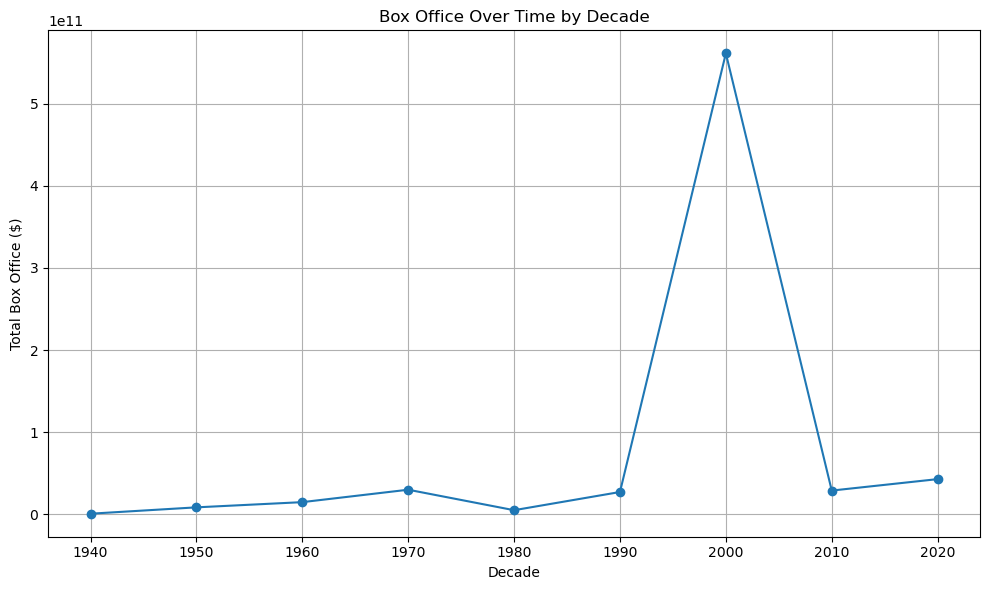

In [97]:
df_3['Release date'] = pd.to_datetime(df_3['Release date'])

# Round release date to decade
df_3['Decade'] = (df_3['Release date'].dt.year // 10) * 10

# Group by decade and sum box office revenues
df_decade = df_3.groupby('Decade')['Box office'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_decade['Decade'], df_decade['Box office'], marker='o', linestyle='-')
plt.title('Box Office Over Time by Decade')
plt.xlabel('Decade')
plt.ylabel('Total Box Office ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

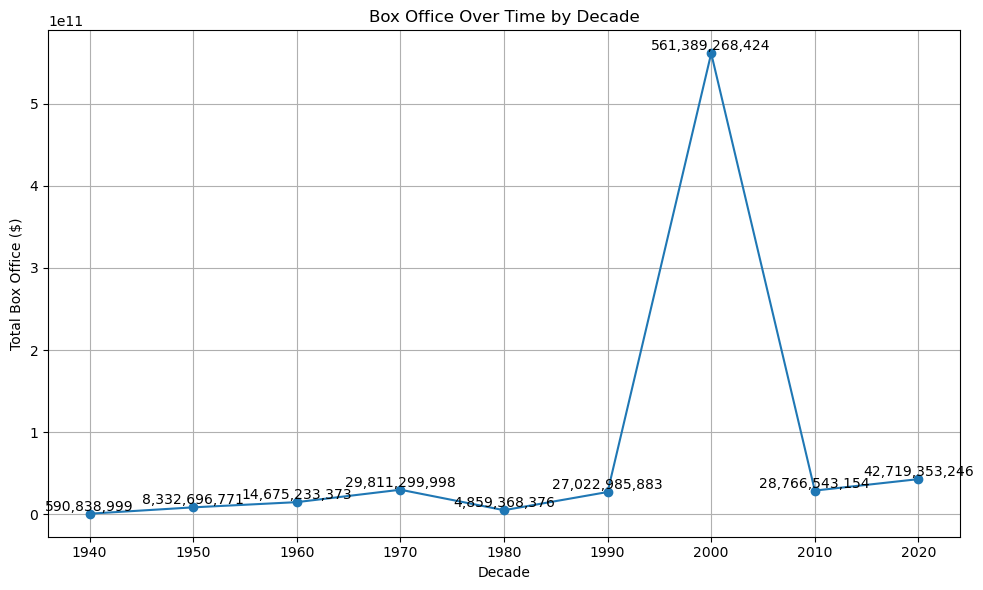

In [98]:
# Round release date to decade
df_3['Decade'] = (df_3['Release date'].dt.year // 10) * 10

# Group by decade and sum box office revenues
df_decade = df_3.groupby('Decade')['Box office'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_decade['Decade'], df_decade['Box office'], marker='o', linestyle='-')
plt.title('Box Office Over Time by Decade')
plt.xlabel('Decade')
plt.ylabel('Total Box Office ($)')
plt.grid(True)

# Annotate each point with its corresponding value
for x, y in zip(df_decade['Decade'], df_decade['Box office']):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

#### Outlier Detected

In [99]:
df_3['Box office']

0      164000000
1       76400000
2         960000
3        1300000
4      267399999
         ...    
366   1935761693
367   1935761693
368   1935761693
369   1935761693
370   1935761693
Name: Box office, Length: 371, dtype: float64

In [100]:
# Find minimum and maximum box office values
min_box_office = df_3['Box office'].min()
max_box_office = df_3['Box office'].max()

print("Minimum Box Office:", min_box_office)
print("Maximum Box Office:", max_box_office)

Minimum Box Office: 0.0
Maximum Box Office: 500000302000.0


In [101]:
# Find the row with the maximum box office value
max_box_office_index = df_3['Box office'].idxmax()
max_box_office_row = df_3.loc[max_box_office_index]

print(f'The row with the maximum box office value is:\n{max_box_office_row}')

The row with the maximum box office value is:
movie_name            Whispers An Elephants Tale
Running time (min)                         01:12
Release date                 2000-03-10 00:00:00
Box office                          500000302000
Decade                                      2000
Name: 218, dtype: object


Outlier detected, Whispers An Elephants Tale was in a different currency.

In [102]:
outlier = df_3[df_3['movie_name'] == 'Whispers An Elephants Tale']
outlier

,movie_name,Running time (min),Release date,Box office,Decade
218,Whispers An Elephants Tale,01:12,2000-03-10,500000302000,2000


The movie "Whispers: An Elephant's Tale," released by Disney in 2000, did not have a wide theatrical release and therefore did not generate significant box office revenue. Instead, it was primarily distributed as a direct-to-video release in many regions. Consequently, specific box office earnings for this film are not available, as it did not perform as a conventional theatrical release would.

Resolution: Deletion

In [103]:
df_3 = df_3.drop(index=218)

In [104]:
outlier = df_3[df_3['movie_name'] == 'Whispers An Elephants Tale']
outlier

,movie_name,Running time (min),Release date,Box office,Decade


#### Scatter Plot Relationship between total box office earnings and count of release dates by decade

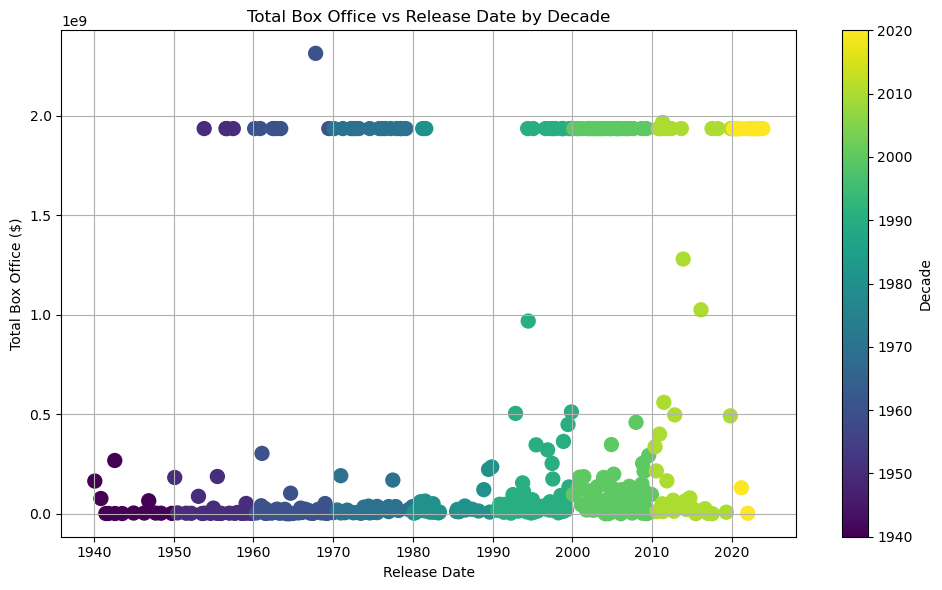

In [105]:
# Aggregate data to get total box office sum per decade and release date by decade
df_agg = df_3.groupby(['Decade', 'Release date']).agg({'Box office': 'sum'}).reset_index()

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(df_agg['Release date'], df_agg['Box office'], s=100, c=df_agg['Decade'], cmap='viridis')

# Colorbar to represent decades
cbar = plt.colorbar()
cbar.set_label('Decade')

plt.title('Total Box Office vs Release Date by Decade')
plt.xlabel('Release Date')
plt.ylabel('Total Box Office ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [106]:
df_3.head(1)

,movie_name,Running time (min),Release date,Box office,Decade
0,Pinocchio (1940 film),01:28,1940-02-07,164000000,1940


#### Histogram of Total Box Office Earnings per Decade

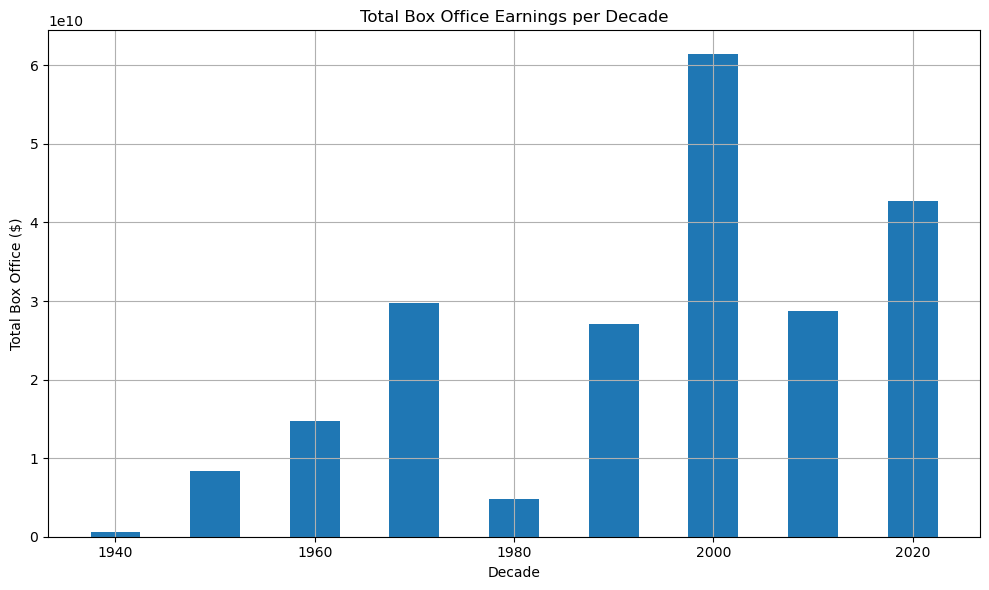

In [107]:
# Grouping the DataFrame by decade and summing up the box office earnings for each decade
total_box_office_per_decade = df_3.groupby('Decade')['Box office'].sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(total_box_office_per_decade.index, total_box_office_per_decade, width=5)

plt.title('Total Box Office Earnings per Decade')
plt.xlabel('Decade')
plt.ylabel('Total Box Office ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [108]:
df_3.head(1)

,movie_name,Running time (min),Release date,Box office,Decade
0,Pinocchio (1940 film),01:28,1940-02-07,164000000,1940


#### Pie Chart of Box Office Earnings

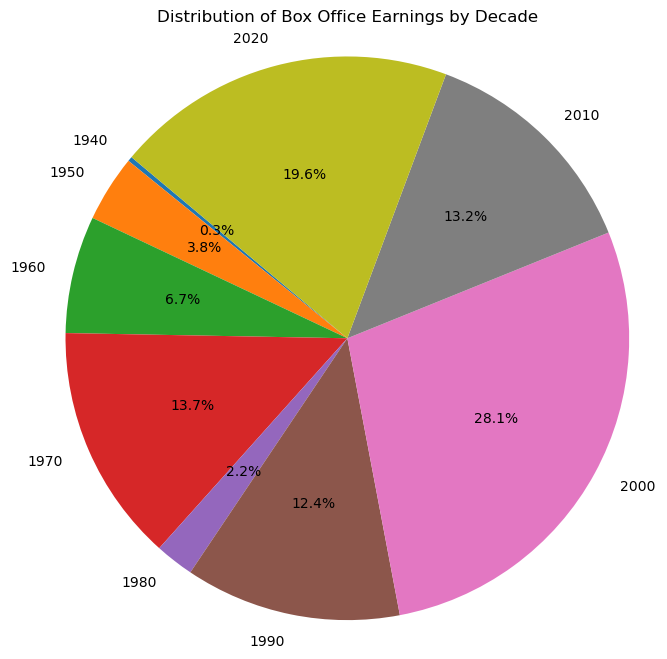

In [109]:
# Summing up the box office earnings for each decade
total_box_office_per_decade = df_3.groupby('Decade')['Box office'].sum()

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(total_box_office_per_decade, labels=total_box_office_per_decade.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Box Office Earnings by Decade')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [110]:
df_3.head(1)

,movie_name,Running time (min),Release date,Box office,Decade
0,Pinocchio (1940 film),01:28,1940-02-07,164000000,1940


### Seaborn

#### Boxplot displaying distribution of box office earnings per decade
- detect outliers

<Axes: xlabel='Decade', ylabel='Box office'>

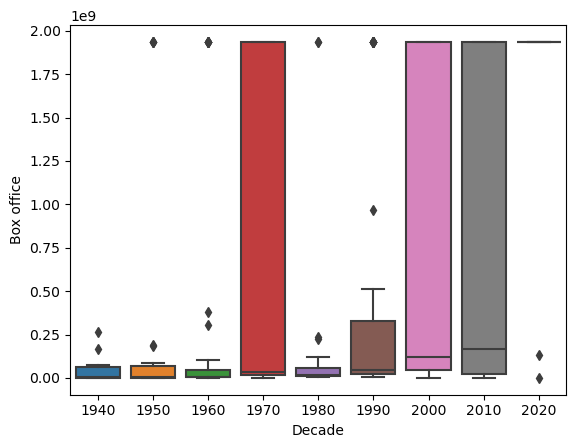

In [111]:
sns.boxplot(x='Decade', y='Box office', data=df_3)

In [112]:
df_3.head(1)

,movie_name,Running time (min),Release date,Box office,Decade
0,Pinocchio (1940 film),01:28,1940-02-07,164000000,1940


#### Count Plot of movies releaseed in each decade

<Axes: xlabel='Decade', ylabel='count'>

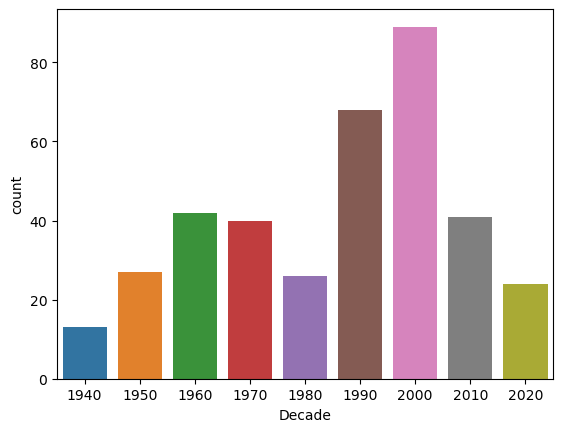

In [113]:
sns.countplot(x='Decade', data=df_3)

In [114]:
df_3.head(1)

,movie_name,Running time (min),Release date,Box office,Decade
0,Pinocchio (1940 film),01:28,1940-02-07,164000000,1940


### Plotly

#### Area Chart of Total Box Office Revenue per decade

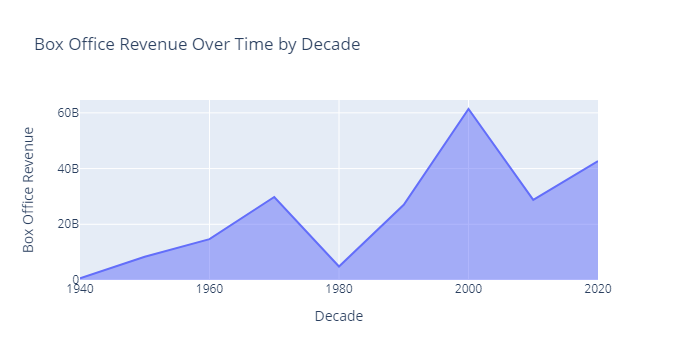

In [115]:
# Convert 'Release date' to datetime if not already
df_3['Release date'] = pd.to_datetime(df_3['Release date'])

# Group by decade and sum the box office revenue
df_box_office_by_decade = df_3.groupby('Decade')['Box office'].sum().reset_index()

# Create the Area Chart
fig = px.area(df_box_office_by_decade, x='Decade', y='Box office', title='Box Office Revenue Over Time by Decade',
              labels={'Decade': 'Decade', 'Box office': 'Box Office Revenue'}, 
              hover_data={'Decade': False, 'Box office': True})

# Show the plot
fig.show()

In [116]:
df_3.head(1)

,movie_name,Running time (min),Release date,Box office,Decade
0,Pinocchio (1940 film),01:28,1940-02-07,164000000,1940


#### Violin Plot of distribution of box office earnings for each decade

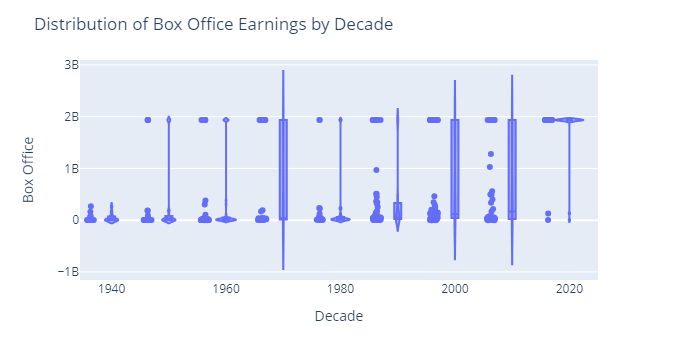

In [117]:
# Assuming df_3 is your DataFrame
fig = px.violin(df_3, x='Decade', y='Box office', box=True, points="all")

# Customize the layout if needed
fig.update_layout(title='Distribution of Box Office Earnings by Decade',
                  xaxis_title='Decade',
                  yaxis_title='Box Office',
                  )

# Show the plot
fig.show()

In [118]:
df_3.head(1)

,movie_name,Running time (min),Release date,Box office,Decade
0,Pinocchio (1940 film),01:28,1940-02-07,164000000,1940


### Interquartile Range (IQR)

Measure of statistical dispersion
- Calculated as the difference between the third quartile (Q3) and the first quartile (Q1) of a dataset.
- Used to identify the spread of the middle 50% of the data.

In [119]:
# Calculate the first quartile (Q1)
Q1 = df_3['Box office'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = df_3['Box office'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

print("Interquartile Range (IQR):", IQR)

Interquartile Range (IQR): 1924761693.0


Difference between the third quartile (Q3) and the first quartile (Q1) of the box office earnings data is approximately 1924761693.0

## Statistical Analysis

### Descriptive Statistics (summary statistics)

In [120]:
df_3.describe()

,Release date,Box office,Decade
count,370,370,370
mean,1990-05-26 12:00:00,589641314,1986
min,1940-02-07 00:00:00,0,1940
25%,1972-11-03 06:00:00,11000000,1970
50%,1996-02-26 12:00:00,52250000,1990
75%,2006-04-05 06:00:00,1935761693,2000
max,2023-11-17 00:00:00,1935761693,2020
std,NaN,841469910,22


#### Hypothesis testing

In [121]:
# Calculate basic statistics for the 'Box office' column
box_office_stats = df_3['Box office'].describe()

print("Basic statistics for Box Office:")
print(box_office_stats)

# Calculate additional statistics if needed
# For example, skewness and kurtosis
skewness = stats.skew(df_3['Box office'])
kurtosis = stats.kurtosis(df_3['Box office'])

print("\nSkewness:", skewness)
print("Kurtosis:", kurtosis)

Basic statistics for Box Office:
count          370
mean     589641314
std      841469910
min              0
25%       11000000
50%       52250000
75%     1935761693
max     1935761693
Name: Box office, dtype: float64

Skewness: 0.9444799257609094
Kurtosis: -1.0562822836042778


#### t-tests

Used to determine if there is a significant difference between the means

In [122]:
# Create an empty dictionary to store t-test results
t_test_results = {}

# Group data by decade
grouped_data = df_3.groupby('Decade')

# Perform t-tests for each pair of decades
for decade1, data1 in grouped_data:
    for decade2, data2 in grouped_data:
        if decade1 < decade2:
            # Perform t-test
            t_statistic, p_value = stats.ttest_ind(data1['Box office'], data2['Box office'])
            # Store the result
            t_test_results[(decade1, decade2)] = (t_statistic, p_value)

# Print t-test results
for decades, result in t_test_results.items():
    decade1, decade2 = decades
    t_statistic, p_value = result
    print(f"T-test between decades {decade1} and {decade2}:")
    print(f"   T-statistic: {t_statistic}")
    print(f"   P-value: {p_value}")
    print()

T-test between decades 1940 and 1950:
   T-statistic: -1.3550068515187959
   P-value: 0.18341630692560262

T-test between decades 1940 and 1960:
   T-statistic: -1.5058358533966993
   P-value: 0.13804645597149257

T-test between decades 1940 and 1970:
   T-statistic: -2.6789414958967406
   P-value: 0.009916327038368405

T-test between decades 1940 and 1980:
   T-statistic: -0.9712250868528151
   P-value: 0.33774291296393866

T-test between decades 1940 and 1990:
   T-statistic: -1.8048242048457221
   P-value: 0.0749127183897504

T-test between decades 1940 and 2000:
   T-statistic: -2.644091739950184
   P-value: 0.009511621967832527

T-test between decades 1940 and 2010:
   T-statistic: -2.773504649336389
   P-value: 0.007682393717450605

T-test between decades 1940 and 2020:
   T-statistic: -11.690373074932985
   P-value: 1.2235616637749225e-13

T-test between decades 1950 and 1960:
   T-statistic: -0.23264564486020622
   P-value: 0.8167457996089864

T-test between decades 1950 and 19

#### ANOVA

Variance test on box office revenue across different decaddes

In [123]:
# Grouping box office revenue by decade
box_office_by_decade = [group_data['Box office'] for _, group_data in df_3.groupby('Decade')]

# Performing ANOVA
anova_result = f_oneway(*box_office_by_decade)

# Printing ANOVA result
print("ANOVA F-value:", anova_result.statistic)
print("ANOVA p-value:", anova_result.pvalue)

ANOVA F-value: 11.082627089171467
ANOVA p-value: 5.0578417687944844e-14


#### Regression analysis

##### Statsmodel

In [124]:
# Define the formula for regression
formula = 'Q("Box office") ~ Decade'

# Perform regression analysis
model = smf.ols(formula=formula, data=df_3).fit()

# Print regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Q("Box office")   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     35.12
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           7.14e-09
Time:                        18:18:59   Log-Likelihood:                -8111.4
No. Observations:                 370   AIC:                         1.623e+04
Df Residuals:                     368   BIC:                         1.623e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.226e+10   3.86e+09     -5.773      0.0

##### scikit-learn

Performing linear regression

In [125]:
# Extracting features (X) and target variable (y)
X = df_3[['Decade']]
y = df_3['Box office']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Calculating the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Printing the coefficients
print('Coefficients:', model.coef_)

# Printing the Mean Squared Error
print('Mean Squared Error:', mse)

Coefficients: [11517384.20795009]
Mean Squared Error: 5.5788585712747014e+17
